In [84]:
import numpy as np
import sympy as sm
from scipy import optimize

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from IPython.display import display

## Cournot Model

Cournot Model applies for a market of the structure of a duopoly in which each firm chooses the quantity they want to supply to a demand.

To solve this we suppose two firms with symetric costs functions and also the production of homogeneous goods

The residual demand curve could be consider as what one firm gets of the total demand

In [192]:
q1 = sm.Symbol('q1')
q2 = sm.Symbol('q2')
Q = sm.Symbol('Q')
total_Q = (sm.Eq(q1+q2,Q))
P = sm.Symbol('P')
a = sm.Symbol('a')
b = sm.Symbol('b')

In [86]:
inv_demand = a - b*Q
inv_demand

-Q*b + a

We use the inverse demand because is a function of the quantities that both firms are going to sell. Q is the sum of the quantities of both firms

Lets derive the residual demand of firm 1

In [87]:
direct_d = sm.Eq(inv_demand,P)
direct_demand = sm.solve(direct_d,Q)
direct_demand[0]

(-P + a)/b

In [88]:
q1 = sm.Symbol('q1')
new_q1 = sm.Eq(direct_demand[0]-q2,q1) #get the output of firm 1 based on firm 2 output and demand
new_q1 

Eq(-q2 + (-P + a)/b, q1)

In [89]:
inverse_demand1 = sm.solve(new_q1,P)
inverse_demand1[0]

a - b*q1 - b*q2

If we do the same for the firm 2 we will get the same result but in function of q1 because of the symmetry

In [90]:
new_q2 = sm.Eq(direct_demand[0]-q1,q2)
new_q2

Eq(-q1 + (-P + a)/b, q2)

In [91]:
inverse_demand2 = sm.solve(new_q2,P)
inverse_demand2[0]

a - b*q1 - b*q2

In the most general case of the Cournot model it is assumed that we have the same cost function for each firm.
So lets define a function for the cost

In [92]:
cost = sm.Symbol('c')
cost_func = cost*Q
cost_func

Q*c

In [93]:
MC = abs(sm.diff(cost_func,Q)) #marginal cost, is always increasing if we increase the production of the good that's why is always positive
MC

Abs(c)

Now that we have the price that is the inverse demand and the quantities that each firm produces and also it's cost we can get the profit function

In [94]:
profit1 = inverse_demand1[0]*q1-cost_func
profit1

-Q*c + q1*(a - b*q1 - b*q2)

In [95]:
profit2 = inverse_demand2[0]*q2-cost_func
profit2

-Q*c + q2*(a - b*q1 - b*q2)

In [168]:
FOC1 = sm.diff(inverse_demand1[0]*q1,q1) - sm.diff(cost_func,Q)
FOC1 = sm.Eq(FOC1,0) #equal to 0 so we can solve for the optimize q1
print(FOC1)

opt_q1 = sm.solve(FOC1,q1)
opt_q1f = sm.Eq(opt_q1[0],q1)
opt_q1f

Eq(a - 2*b*q1 - b*q2 - c, 0)


Eq((a - b*q2 - c)/(2*b), q1)

In [169]:
FOC2 = sm.diff(inverse_demand2[0]*q2,q2) - sm.diff(cost_func,Q)
FOC2 = sm.Eq(FOC2,0) #equal to 0 so we can solve for the optimize q1
print(FOC2)

opt_q2 = sm.solve(FOC2,q2)
opt_q2f = sm.Eq(opt_q2[0],q2)
opt_q2f

Eq(a - b*q1 - 2*b*q2 - c, 0)


Eq((a - b*q1 - c)/(2*b), q2)

## When we get the optimal output of each firm it can be observed that it depends on the output of the other, so at the end the equilibrium in the market is going to be a Nash equilibrium between both outputs.

In [183]:
c = sm.Symbol('c')
#in this part we want to get the value of q1 when we equal the optimal quantity of both firms
sol1 = opt_q1[0].subs(q2,opt_q2[0])
sub1 = sm.Eq(sol1,q1)
sol_sub1 = sm.solve(sub1,q1)
sol_sub1[0]

(a - c)/(3*b)

In [184]:
#we do the same but for the case of the firm 2
sol2 = opt_q2[0].subs(q1,opt_q1[0])
sub2 = sm.Eq(sol2,q2)
sol_sub2= sm.solve(sub2,q2)
sol_sub2[0]

(a - c)/(3*b)

In [193]:
#we create functions for the result that we obtain
sol_q1_func = sm.lambdify(args = (a,b,c), expr = sol_sub1[0])
sol_q2_func = sm.lambdify(args = (a,b,c), expr = sol_sub2[0])

a_vec = np.array([1,2,3,5,8])
b_val = 0.5
c_val = 0.5

best_response_a = sol_q1_func(a_vec, b_val, c_val)
for d in best_response_a:
    print(f'best response q1(q2): {d:1.3f}')

best response q1(q2): 0.333
best response q1(q2): 1.000
best response q1(q2): 1.667
best response q1(q2): 3.000
best response q1(q2): 5.000


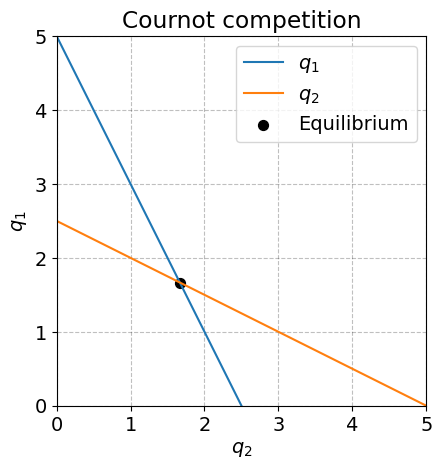

In [195]:
b_val = 0.5
c_val = 0.5
a_val = 3

q2_vec = np.linspace(-5, 5, 100)
q1 = (a_val - b_val*q2_vec - c_val)/(2*b_val)
q2 = (a_val - b_val*q1 - c_val)/(2*b_val)
intersection_q1_q2 = (a_val - c_val)/(3*b_val)


fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(q2,q1,label='$q_{1}$')
ax.plot(q1,q2,label='$q_{2}$')
ax.scatter(intersection_q1_q2,intersection_q1_q2,s=50, marker='o', color='black',label='Equilibrium')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.gca().set_aspect('equal', adjustable='box')
ax.set_title('Cournot competition')
ax.set_xlabel('$q_2$')
ax.set_ylabel('$q_1$')
ax.legend(loc='upper right'); # Activate legend (uses the labels in ax.plot())

## Numerical Analysis

In [37]:
# Ensures automatic reloading of module
%load_ext autoreload 
%autoreload 2
# Import all functions from module "cournot1" 
from cournot1 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
test = Firm1()

test.solve_q1()

optimal_q1 = test.q1
print(optimal_q1)

profit = (13-4-optimal_q1-1)*optimal_q1-12
print(profit)

4.000000000000003
4.0
